In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from skimage import io, filters

**1) Thresholding**

In [9]:
lily_im = io.imread('/home/apd/ImageAnalysis/HW2/robert-mapplethrope-calla-lily-1984.png')
istanbul_im = io.imread('/home/apd/ImageAnalysis/HW2/istanbul_arch_museum_gray_crop.png')

In [23]:
lily_threshold = filters.threshold_otsu(lily_im)
istanbul_threshold = filters.threshold_otsu(istanbul_im)

lily_thresholded = (lily_im > lily_threshold).astype(np.uint8)
istanbul_thresholded = (istanbul_im > istanbul_threshold).astype(np.uint8)

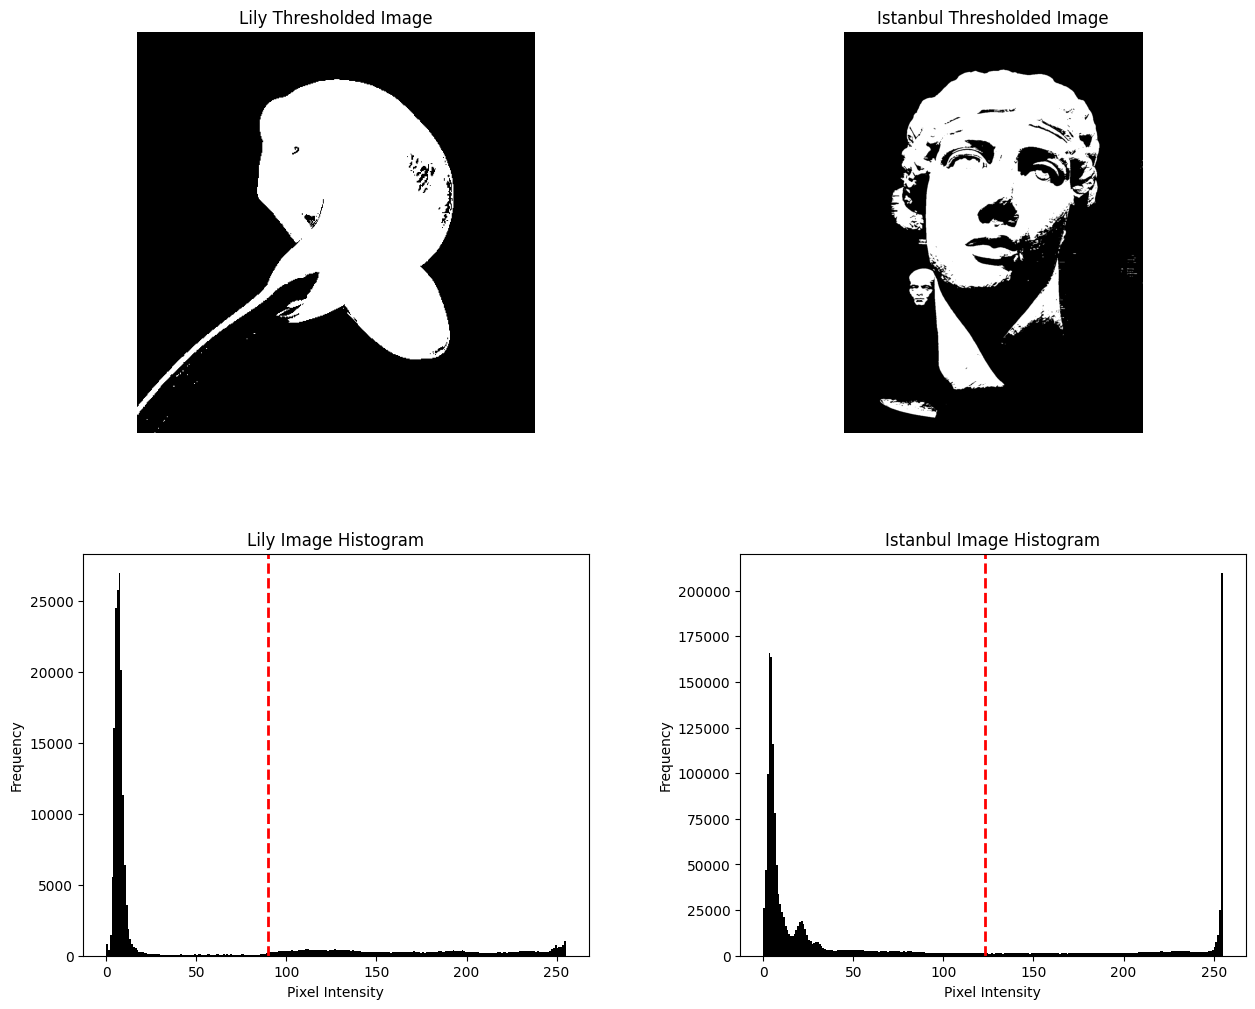

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Lily binary thresholded image
ax[0, 0].imshow(lily_thresholded, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title('Lily Thresholded Image')

# Istanbul binary thresholded image
ax[0, 1].imshow(istanbul_thresholded, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title('Istanbul Thresholded Image')

# Lily Histogram
ax[1, 0].hist(lily_im.ravel(), bins=256, color='black')
ax[1, 0].axvline(lily_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1, 0].set_title('Lily Image Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Istanbul Histogram
ax[1, 1].hist(istanbul_im.ravel(), bins=256, color='black')
ax[1, 1].axvline(istanbul_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1, 1].set_title('Istanbul Image Histogram')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

For both images, It seems like it chose somewhere around the midpoint--which makes sense for minimizing intraclass variance/maximizing interclass variance. For the istanbul image this is even more clear since there are peaks at each end of the spectrum, so the threshold is almost exactly in the middle. For the Lily image it is a little more "left", or low, since the intensity is more spread out in the upper regions and there's no real peak towards the higher values.

Text(0, 0.5, 'Frequency')

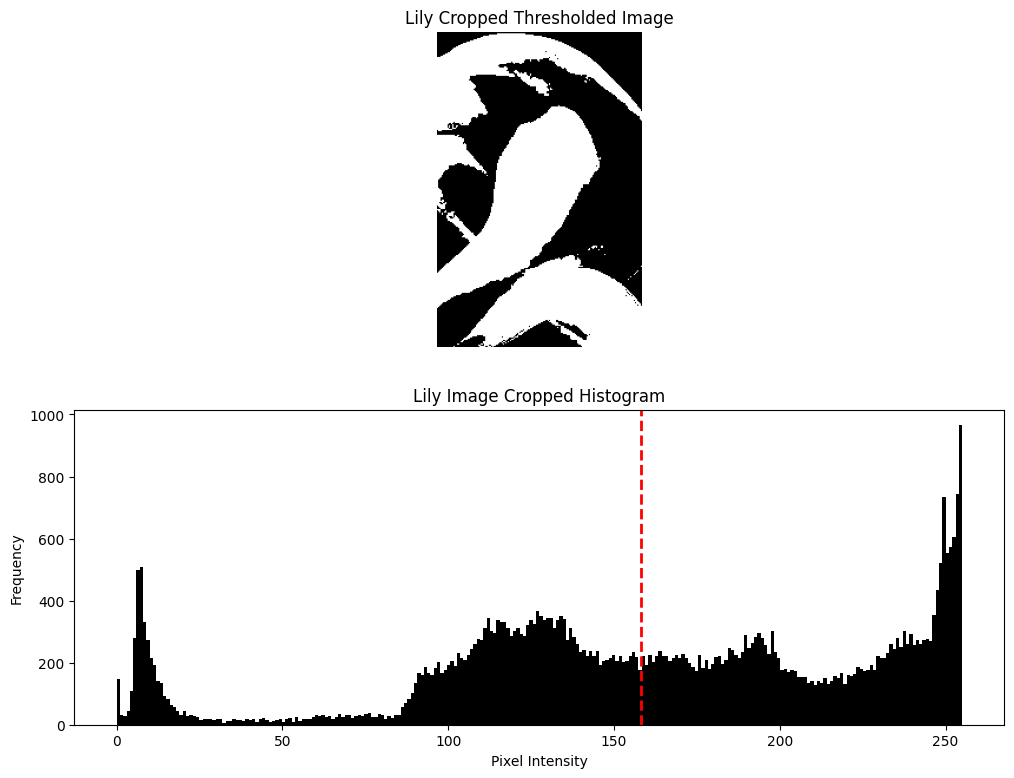

In [39]:
lily_CROP_im = io.imread('/home/apd/ImageAnalysis/HW2/robert-mapplethrope-calla-lily-1984_CROP.png')
lily_CROP_threshold = filters.threshold_otsu(lily_CROP_im)
lily_CROP_thresholded = (lily_CROP_im > lily_CROP_threshold).astype(np.uint8)

fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Lily binary thresholded image
ax[0].imshow(lily_CROP_thresholded, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Lily Cropped Thresholded Image')

# Lily Cropped Histogram
ax[1].hist(lily_CROP_im.ravel(), bins=256, color='black')
ax[1].axvline(lily_CROP_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Lily Image Cropped Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

This thresholded image of the cropped lily png looks different because the spread of the intensity values has changed due to the cropping. Before the crop, there was a lot of black, or low intensity valued pixels surrounding the Lily. The cropped version zooms in on the lily, so it's pixel values' are mostly concentrated to the "right", or with high intensity (white). We still see a small peak of black pixels, since it's not a perfect segmentation of the Lily. We see more features of the Lily (at least I think so) with the shadows in this cropped case, since Otsu's method is now being applied to a more concentrated view of the Lily, thus the separation of the two groups of pixel values seems to (qualitatively) boil down to what is shadows under the Lily (and a little bit of black background) vs. the lighter parts of the Lily.

**2) Thresholding, Again!**

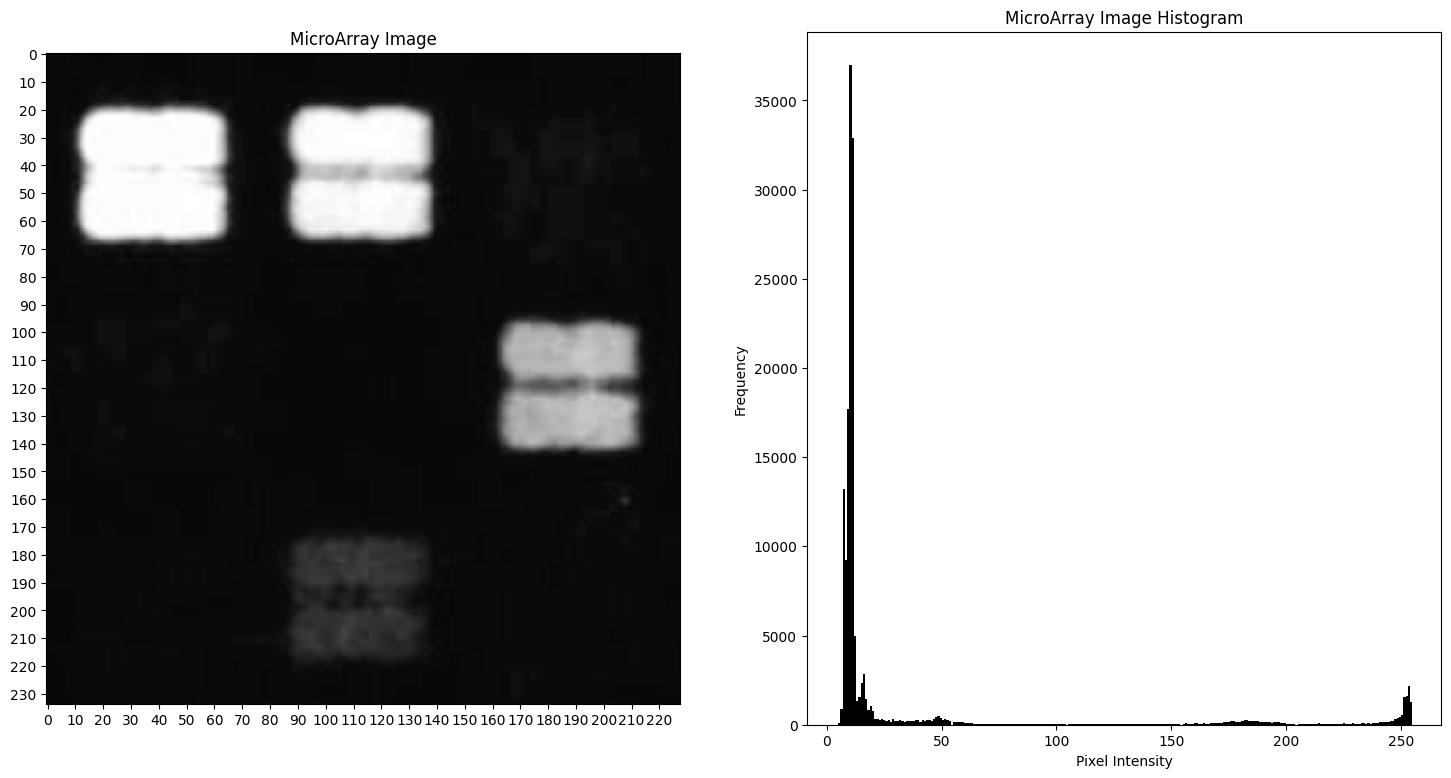

In [83]:
ma_im = io.imread('/home/apd/ImageAnalysis/HW2/microarray_crop.png')

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].imshow(ma_im)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].set_title('MicroArray Image')

ax[1].hist(ma_im.ravel(), bins = 256, color = 'black');
ax[1].set_title('MicroArray Image Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency'); 

I'm going to try doing an ROI analysis in python instead of ImageJ, I think it would be useful to know in upcoming assignments, (perhaps this part of the assignment could be done semi-automatically with edge detection and the below technique. Should it be done automatically? Who knows!)

In [166]:
def get_ROI_intensities(image, roi_list, roi_names=None, show_histograms=False):
    """
    Plots multiple ROIs on the image, calculates the average intensity in each selected region,
    and optionally generates histograms of the pixel values within each ROI.

    Parameters:
    - image: The input image as a 2D numpy array (grayscale).
    - roi_list: A list of tuples, where each tuple contains x_coords and y_coords for an ROI.
                Each ROI is defined as ((x_start, x_end), (y_start, y_end)).
    - roi_names: (Optional) A list of strings that specify names for each ROI.
                 If not provided, the ROIs will be labeled by index.
    - show_histograms: (Optional) Boolean flag to show histograms for each ROI. Default is False.

    Returns:
    - intensities: A list of average intensity values for each ROI.
    """
    # Initialize the list to store average intensities
    intensities = []
    
    # Determine whether we need one or two axes (for histograms)
    if show_histograms:
        fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # One axis for the image, one for histograms
        ax_image, ax_histogram = ax
    else:
        fig, ax_image = plt.subplots(1, figsize=(10, 10))  # Only one axis for the image
    
    # Plot the image
    ax_image.imshow(image, cmap='gray')
    ax_image.axis('off')
    
    # Loop through each ROI
    for idx, (x_coords, y_coords) in enumerate(roi_list):
        x_start, x_end = x_coords
        y_start, y_end = y_coords
        
        # Extract the region of interest (ROI)
        roi_bounding_box = image[y_start:y_end, x_start:x_end]
        ROI = roi_bounding_box.ravel()
        
        # Calculate the average intensity within the ROI
        average_intensity = np.mean(roi_bounding_box)
        intensities.append(average_intensity)
        
        # Add a rectangle (ROI) in red to the image
        rect = Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                         edgecolor='red', facecolor='none', linewidth=2)
        ax_image.add_patch(rect)
        
        # Determine the label for the ROI (use the name if provided, otherwise use the index)
        roi_label = roi_names[idx] if roi_names else f'ROI {idx+1}'
        
        # Label the ROI with its name or index
        ax_image.text(x_start, y_start - 5, roi_label, color='red', fontsize=12)
        
        # Plot histogram if requested
        if show_histograms:
            number_of_bins = (np.max(ROI) - np.min(ROI))
            ax_histogram.hist(ROI, bins=number_of_bins, alpha=0.4, label=roi_label)
    
    # If histograms are enabled, configure the histogram axis
    if show_histograms:
        ax_histogram.set_title('Pixel Value Histograms of ROIs')
        ax_histogram.set_xlabel('Pixel Intensity')
        ax_histogram.set_ylabel('Frequency')
        ax_histogram.legend(loc='best')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
    
    # Print the average intensities
    for idx, intensity in enumerate(intensities):
        roi_label = roi_names[idx] if roi_names else f'ROI {idx+1}'
        print(f'Average Intensity in {roi_label}: {intensity}')
    
    return intensities

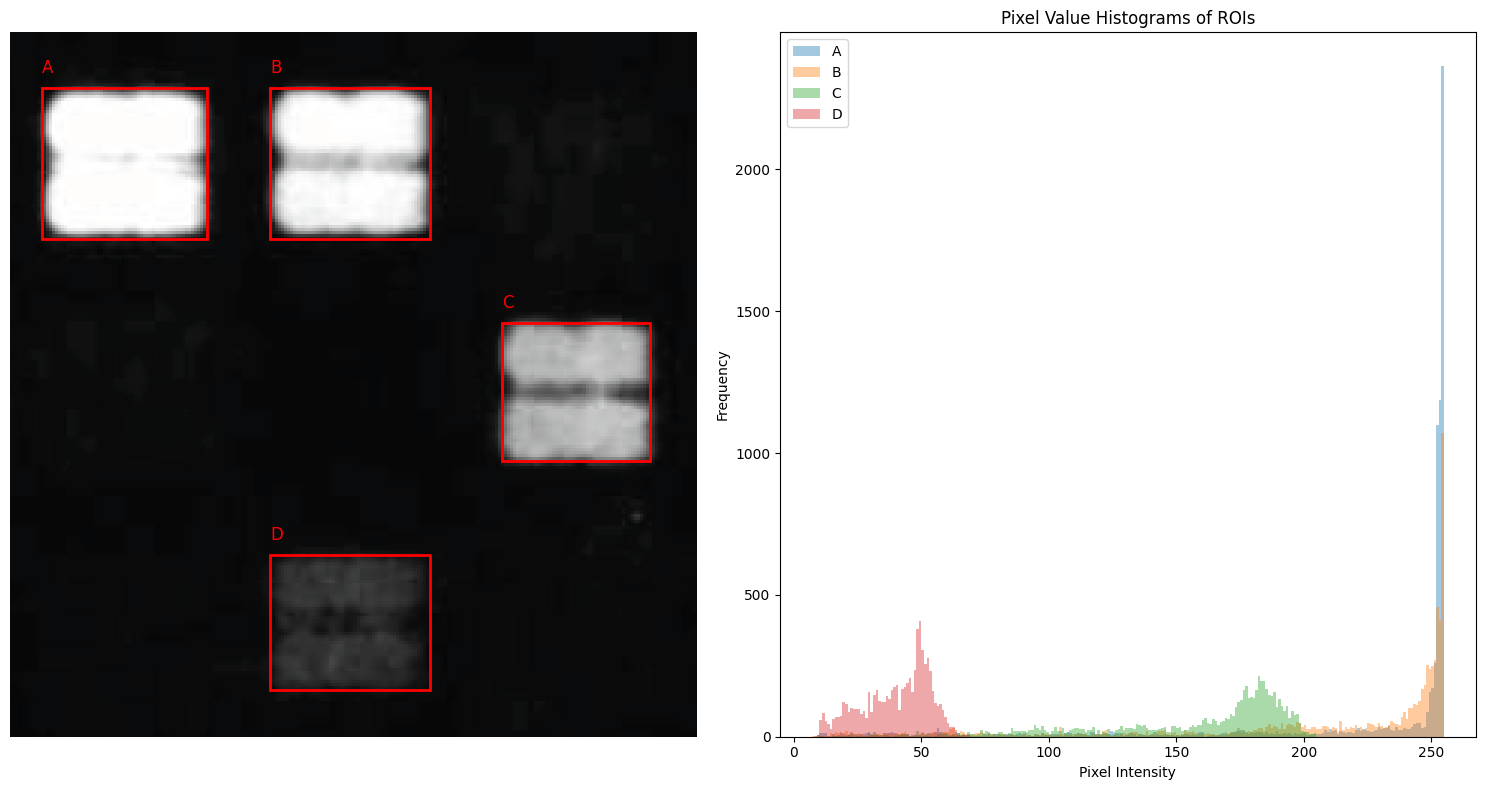

Average Intensity in A: 218.34036363636363
Average Intensity in B: 204.78616352201257
Average Intensity in C: 154.85758651286602
Average Intensity in D: 39.9382250174703


In [170]:
# make sure coords are (x_min --> x_max), (y_min --> y_max)
# weird tuples I know but it meshes well with code 

roi_list = [
    ((10, 65), (18, 68)),     # A
    ((86, 139), (18, 68)),    # B
    ((163, 212), (96, 142)),   # C
    ((86, 139), (173, 218)),   # D
]

field_intensities = get_ROI_intensities(ma_im, roi_list = roi_list, roi_names = ['A','B','C','D'], show_histograms=True);

In [168]:
print(field_intensities[2]/field_intensities[3])

3.877427863785288


If we are just taking the mean, (not accounting for uncertainty) of the intensity for each field, and knowing that the protein density and intensity are directly proportional, then the protein density in field C is ~4X that in field D. However, mean might not be the best measure. Looking at the histogram, maybe either refining the boxes or fitting a distribution would provide more measured results.

In [171]:
print(field_intensities[0]/field_intensities[3])

5.466952112690395


Going by mean again, the protein density in field A is ~5.5X that in field D.